COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [1]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone -b explanations https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py helper_funcs

Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 352, done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 352 (delta 30), reused 57 (delta 14), pack-reused 271
Receiving objects: 100% (352/352), 7.53 MiB | 17.84 MiB/s, done.
Resolving deltas: 100% (153/153), done.
Getting helper functions...


# MNIST Handwritten Digits Classifier

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from math import ceil,floor
import helper_funcs as helper

In [3]:
# this is the directory where we will keep and external files, eg. data, logs
model_root_dir = '/content/'

# get data
mnist = helper.MNIST_data(model_root_dir+'MNIST_data/')

Download complete.
Save complete.


In [0]:
image_dims = (28,28)
input_size = 28**2
num_classes = 10

In [0]:
# Hyperparams

batch_size = 100
learning_rate = 0.1

epochs = 2
iterations = ceil(mnist.number_train_samples/batch_size)

hidden_size = 256

In [0]:
tf.reset_default_graph()

In [0]:
# input placeholders
X_placeholder = tf.placeholder(shape=[None, input_size], dtype=tf.float32, name='X_placeholder')
Y_placeholder = tf.placeholder(shape=[None, num_classes], dtype=tf.int64, name='Y_placeholder')

In [0]:
# Variables

W1 = tf.Variable(np.random.randn(input_size, hidden_size), dtype=tf.float32, name='W1')
b1 = tf.Variable(np.random.randn(hidden_size), dtype=tf.float32, name='b1')

W2 = tf.Variable(np.random.randn(hidden_size, num_classes), dtype=tf.float32, name='W2')
b2 = tf.Variable(np.random.randn(num_classes), dtype=tf.float32, name='b2')

In [0]:
# input to hidden
hidden = tf.nn.relu(tf.matmul(X_placeholder, W1) + b1)

# hidden to output
Y_prediction = tf.matmul(hidden, W2) + b2

In [0]:
# loss function softmax cross entropy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_placeholder, logits=Y_prediction, name='loss'))

In [0]:
# optimizer
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [0]:
# accuracy
correct_prediction = tf.equal(tf.argmax(Y_prediction, 1), tf.argmax(Y_placeholder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
predictions = tf.nn.softmax(Y_prediction)

In [0]:
# Initialize our session and vars
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [14]:
# initialize empty array to hold losses for each training step
losses = np.array([])

for epoch in range(epochs):
    print('New epoch', str(epoch+1)+'/'+str(epochs))
    for iteration in range(iterations):

        # get batches of training data for current step
        batch_xs, batch_ys = mnist.get_batch(iteration, batch_size)

        # run training step and get loss values to plot later
        _, _loss = sess.run([train_step, loss], 
                            feed_dict={
                                X_placeholder: batch_xs,
                                Y_placeholder: batch_ys
                            })

        if (iteration+1) % floor(iterations/5) == 0:

            # get accuracy using validation set
            _accuracy = sess.run(accuracy, feed_dict={X_placeholder : mnist.validation_images,
                                                      Y_placeholder : mnist.validation_labels
                                                     })

            # print current step, batch loss and validation accuracy
            print('step', str(iteration+1)+'/'+str(iterations), 'loss', _loss, 'accuracy', str(round(100*_accuracy,2))+'%')

        # append the loss to the losses array to plot
        losses = np.append(losses, _loss)

New epoch 1/2
step 110/550 loss 5.7977123 accuracy 87.66%
step 220/550 loss 2.3184605 accuracy 89.24%
step 330/550 loss 4.711447 accuracy 90.68%
step 440/550 loss 3.4576893 accuracy 91.36%
step 550/550 loss 3.483296 accuracy 91.86%
New epoch 2/2
step 110/550 loss 0.8010914 accuracy 91.94%
step 220/550 loss 1.8564959 accuracy 92.18%
step 330/550 loss 2.2777967 accuracy 92.22%
step 440/550 loss 1.9370086 accuracy 92.96%
step 550/550 loss 1.8602288 accuracy 92.76%


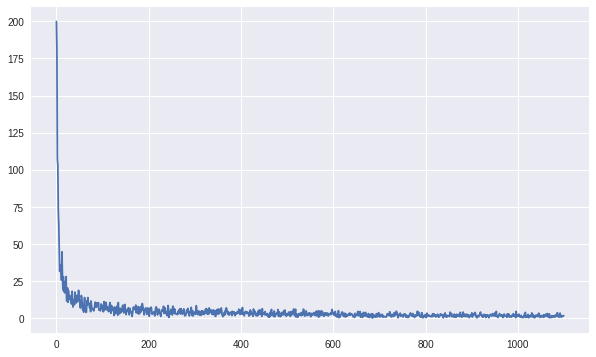

In [15]:
# plot training losses

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(losses)
ax.grid(True)

In [16]:
# find accuracy on test set
_accuracy = sess.run(accuracy, feed_dict={X_placeholder : mnist.test_images,
                                          Y_placeholder : mnist.test_labels
                                         })

print(str(round(100*_accuracy,2))+'%')

91.9%


prediction: 8 answer: 8
0 0.0%
1 0.0%
2 0.0%
3 0.0%
4 0.0%
5 0.0%
6 0.0%
7 0.0%
8 100.0%
9 0.0%


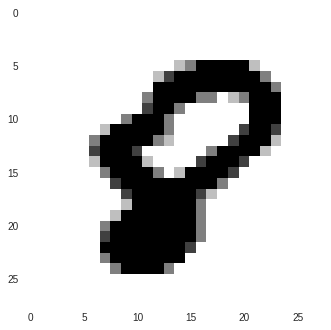

prediction: 5 answer: 5
0 0.0%
1 0.0%
2 0.0%
3 0.0%
4 0.0%
5 100.0%
6 0.0%
7 0.0%
8 0.0%
9 0.0%


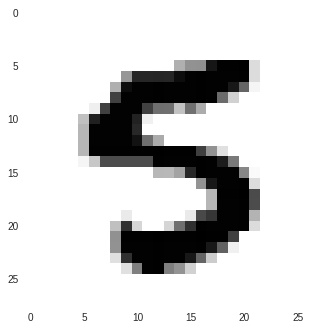

In [17]:
# show test images with prediction probabilities

test_idxs = [2,11]

for test_idx in test_idxs:
    
    test_x, test_y = mnist.test_images[test_idx], mnist.test_labels[test_idx]
    _prediction = sess.run(predictions, feed_dict={X_placeholder: test_x.reshape(1,-1)})
    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    for i,val in enumerate(_prediction[0]):
        print(i, str(round(100*val,3))+'%')

    plt.imshow(test_x.reshape(image_dims), cmap='binary')
    plt.grid(False)
    plt.show()